# Visualizing networks

`pymnet` can produce high-quality images of multilayer and multiplex networks. 
The main method for producing network images in the library uses `matplotlib` as a backend. 
These images can be saved in both vector formats (such as pdf or svg) and raster formats (such as png). 
Alternatively, one can produce pictures of networks using a method that uses Javascript and D3 as a backend for displaying figures. 
These interactive figures can be viewed with any modern browser. 
(Also, `networkx` is used for some layouts).

Drawing networks with the library is easy and is usually done with the `draw` method. Consider, for example, the following code (where the random seeds ensure the reproducibility of the random network model and the spring layout, respectively):

In [1]:
import random
random.seed(42)
import numpy as np
np.random.seed(42)

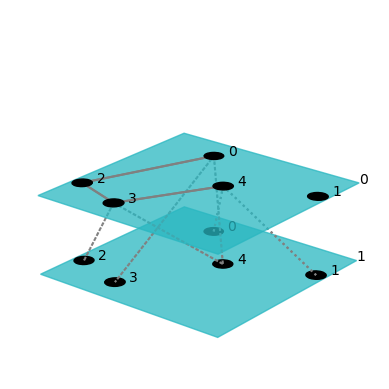

In [2]:
from pymnet import *
net = models.er_multilayer(5, 2, 0.2)
fig = draw(net)

The first line of this code imports `pymnet`. The second line creates a random node-aligned multilayer network with 5 nodes and 2 layers, where two node-layers are connected to each other with a probability of 0.2. The third line then creates a picture of that network (which is shown directly when working in a Jupyter environment and otherwise can be shown by passing `show=True` as an argument to the `draw` function).

You can save the figure to a file, for example, with the following command:

In [3]:
fig.savefig("net.pdf")

Multiplex-network figures can also be produced. For example, running the following code produces the following picture of a multiplex Erdos-Renyi network:

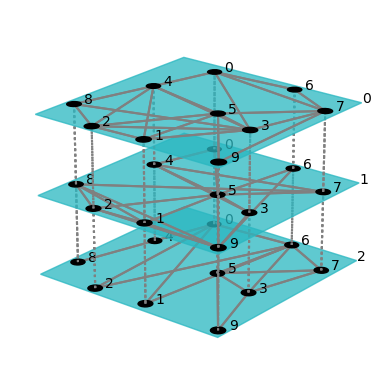

In [4]:
fig = draw(er(10, 3*[0.4]), layout="spring")

There are multiple ways of customizing the figures. For documentation, look at the reference for the draw method. Here is an example usage of the draw method that uses several of the customization options:

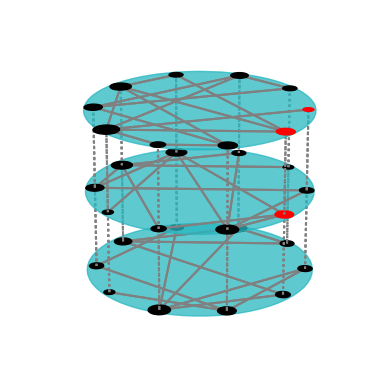

In [5]:
fig = draw(er(10, 3*[0.3]),
           layout="circular",
           layershape="circle",
           nodeColorDict={(0,0):"r", (1,0):"r", (0,1):"r"},
           layerLabelRule={},
           nodeLabelRule={},
           nodeSizeRule={"rule":"degree", "propscale":0.05}
           )

If the network is large, then it is often desirable not to plot the coupling edges. Simply create a network without coupling edges and plot it. 
For example, we can download the [Bernard & Killworth fraternity network](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#bkfrat). 

In [6]:
import requests
dataset = "bkfrat.dat"
fraternity_dataset_url = f"http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/{dataset}"
res = requests.get(fraternity_dataset_url)
with open(dataset, "wb") as f:
    f.write(res.content)

This network might then be plotted like this:

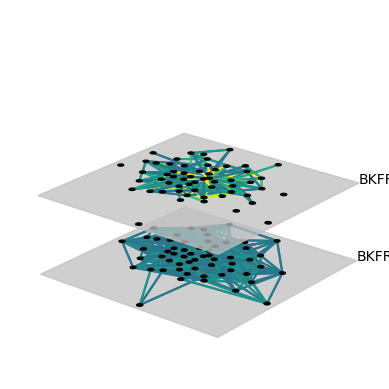

In [7]:
net = read_ucinet(dataset, couplings="none")
net = transforms.threshold(net, 4)
fig = draw(net,
           show=True,
           layout="spring",
           layerColorRule={},
           defaultLayerColor="silver",
           nodeLabelRule={},
           edgeColorRule={"rule":"edgeweight", "colormap":"viridis", "scaleby":0.1}
           )